In [2]:
%reset

# 1. Imports

In [1]:
import mne
import time
import os
import numpy as np
import custom_modules.xdf_to_fif_converter as xtfc
import custom_modules.preprocessing_ptu as prep
import custom_modules.file_handling as  fh
import custom_modules.processing_ptu as proc
import custom_modules.classification_ptu as clas
import custom_modules.visualization_ptu as visu

import importlib
importlib.reload(xtfc)
importlib.reload(prep)
importlib.reload(fh)
importlib.reload(proc)
importlib.reload(clas)
importlib.reload(visu)

<module 'custom_modules.visualization_ptu' from 'C:\\Users\\peter\\Documents\\Code\\master-thesis\\03_analysis\\custom_modules\\visualization_ptu.py'>

# 2. Constants

In [2]:
data_path = 'D:/Diplomarbeit_data/eeg/'
subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A09', 'A10']
trial_type_markers = ['LTR-s', 'LTR-l','RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']

# Paths to interface files:
path_cue_aligned_resampled = '2023_03_22_epoched_cue_aligned'
path_movement_aligned_resampled = '2023_03_22_epoched_movement_aligned'
path_cue_aligned_not_resampled = '2023_03_22_epoched_cue_aligned_not_resampled'
path_movement_aligned_not_resampled = '2023_03_22_epoched_movement_aligned_not_resampled'

__spec__ = None # For multiprocessing
mne.set_log_level('WARNING') #'INFO' 'WARNING'

# 3. Temporal results

# 4. Classification results

# 5. GLM results

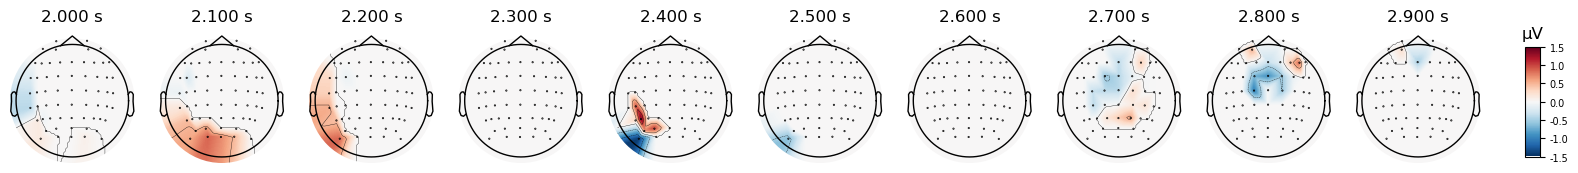

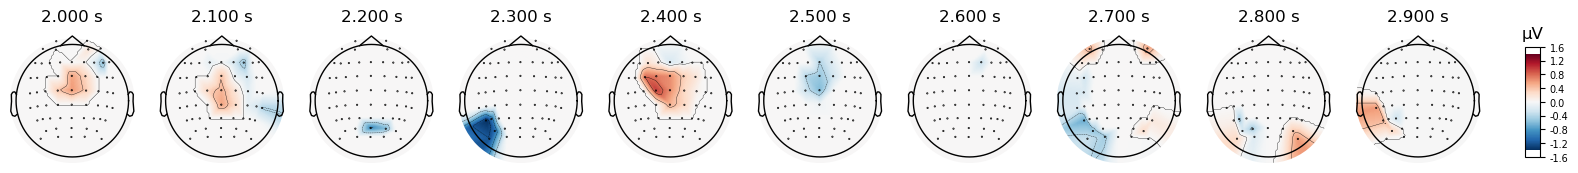

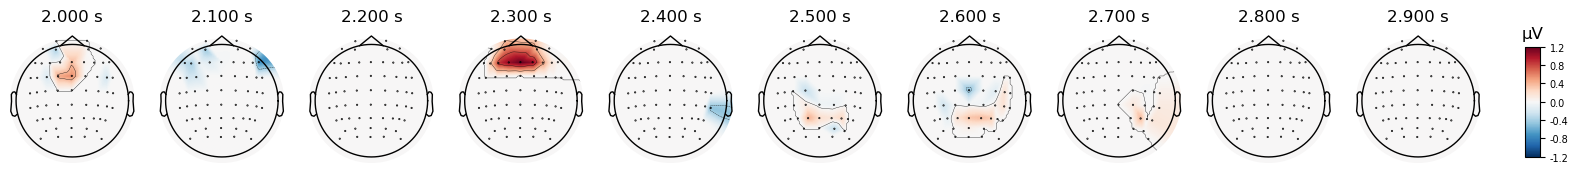

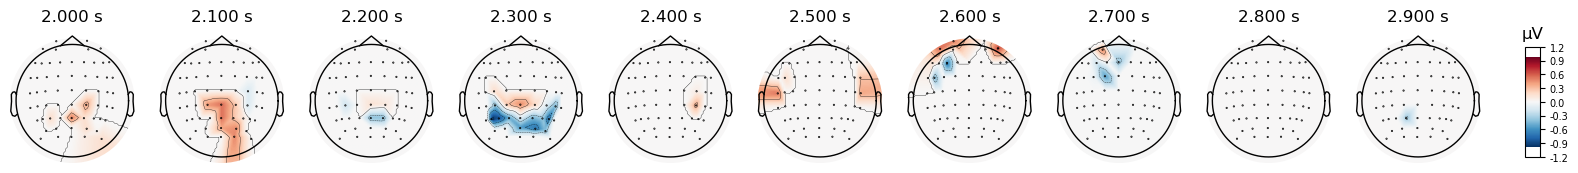

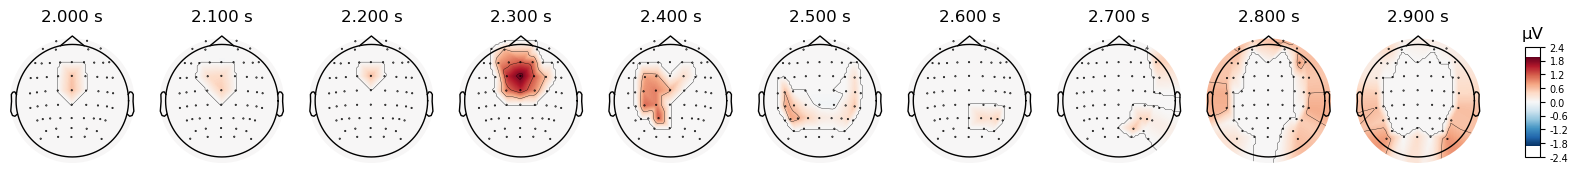

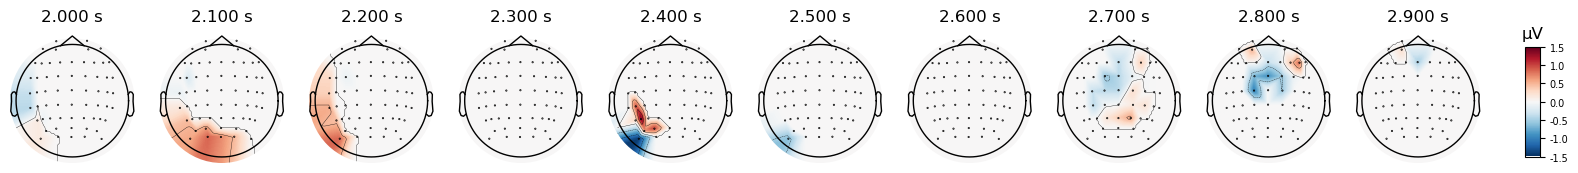

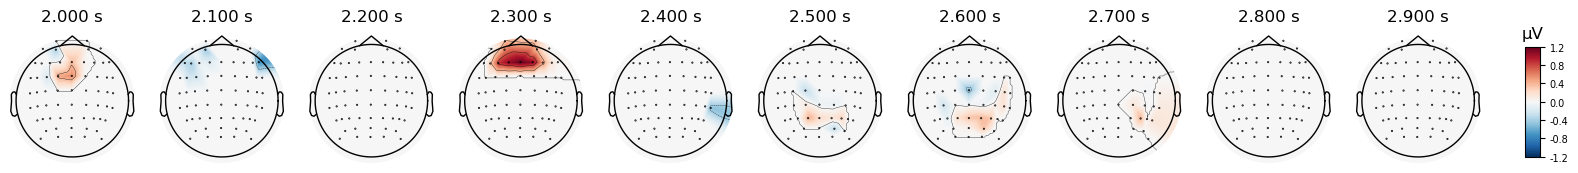

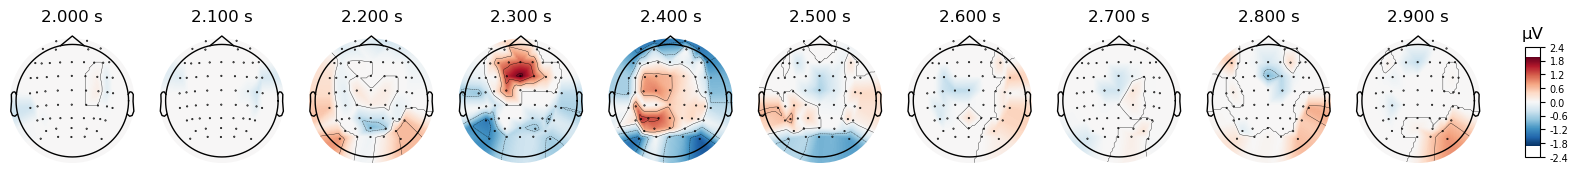

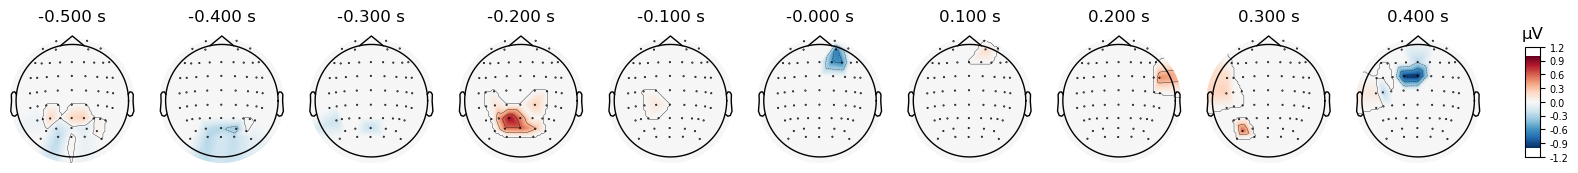

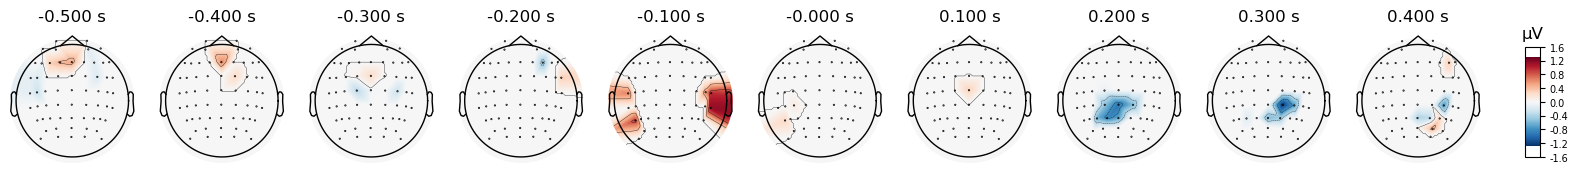

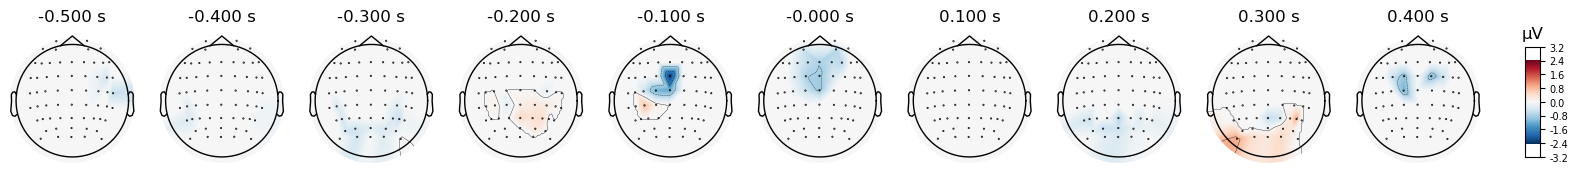

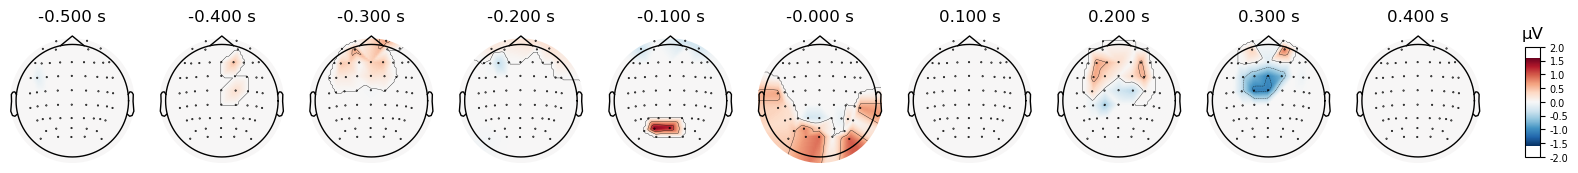

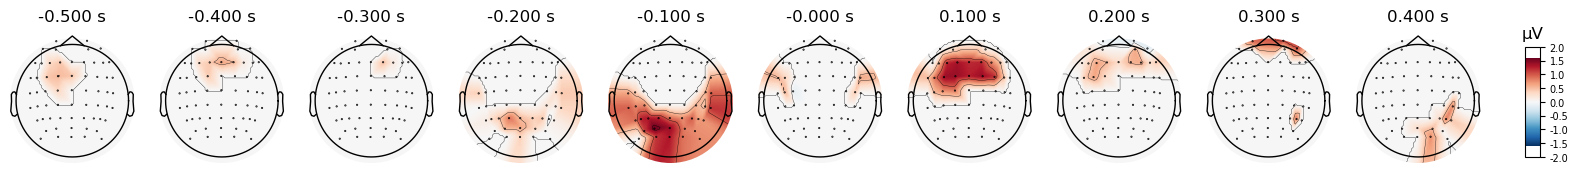

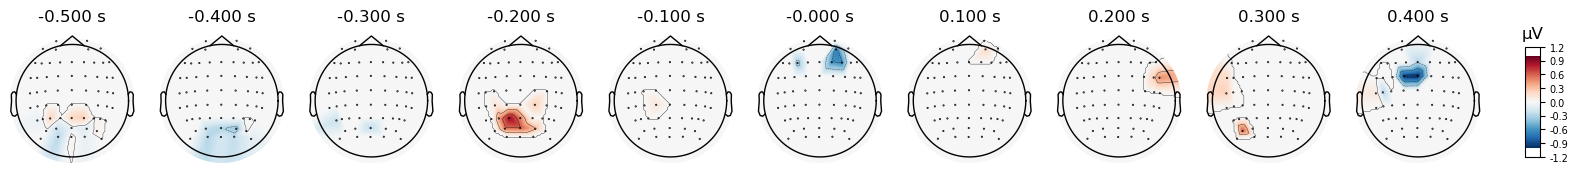

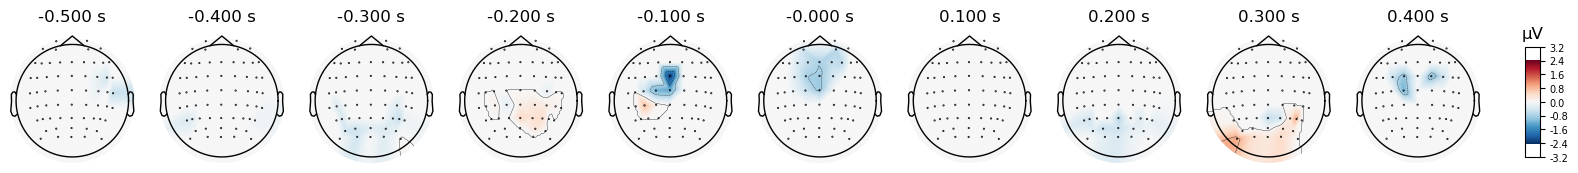

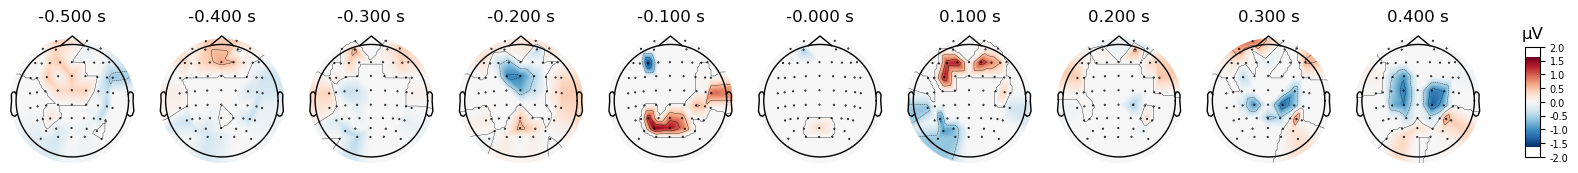

In [7]:
importlib.reload(visu)

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='results', dst_fldr='figs')

avg = visu.glm_significant_topo(src_path, dst_path, subjects, alignment='cue-aligned', p_crit=.05, shrink=True, one_sample=True)

avg = visu.glm_significant_topo(src_path, dst_path, subjects, alignment='cue-aligned', p_crit=.05, shrink=True, one_sample=False)


avg = visu.glm_significant_topo(src_path, dst_path, subjects, alignment='movement-aligned', p_crit=.05, shrink=True, one_sample=True)

avg = visu.glm_significant_topo(src_path, dst_path, subjects, alignment='movement-aligned', p_crit=.05, shrink=True, one_sample=False)




D:/Diplomarbeit_data/eeg/results/param-matrix_A01_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A02_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A03_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A04_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A05_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A06_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A07_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A08_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A09_cue-aligned.npy
D:/Diplomarbeit_data/eeg/results/param-matrix_A10_cue-aligned.npy


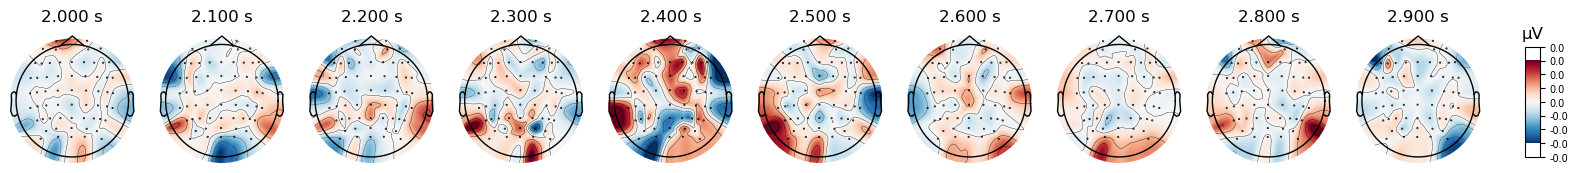

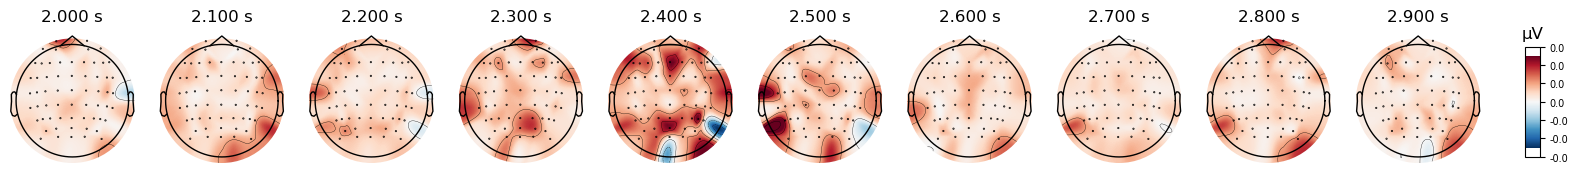

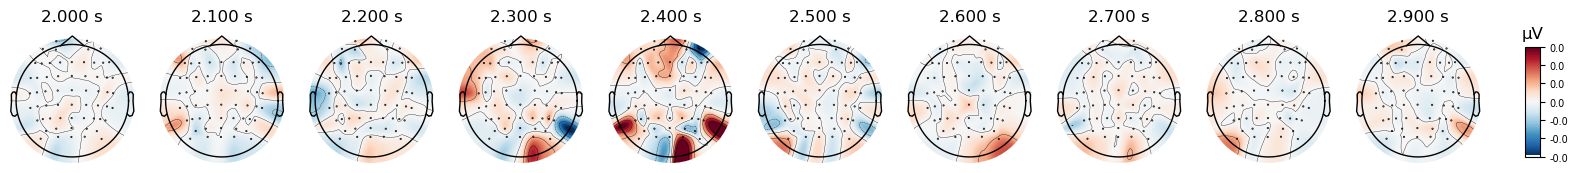

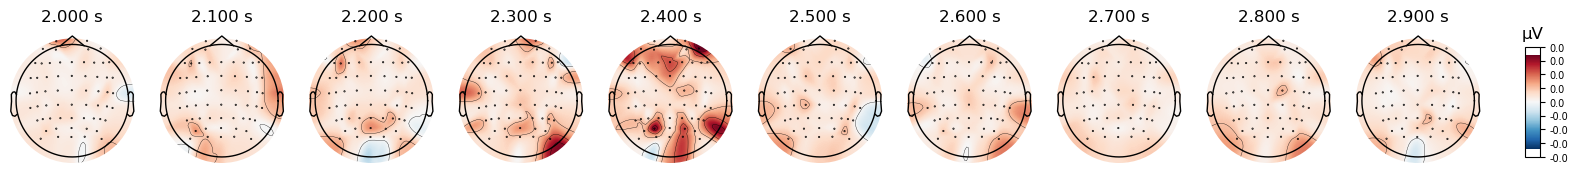

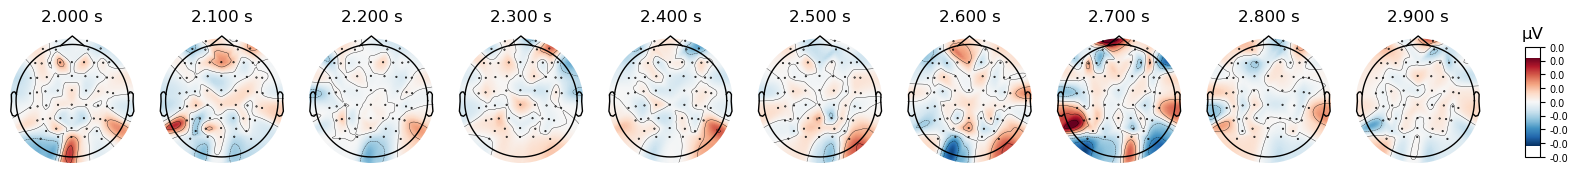

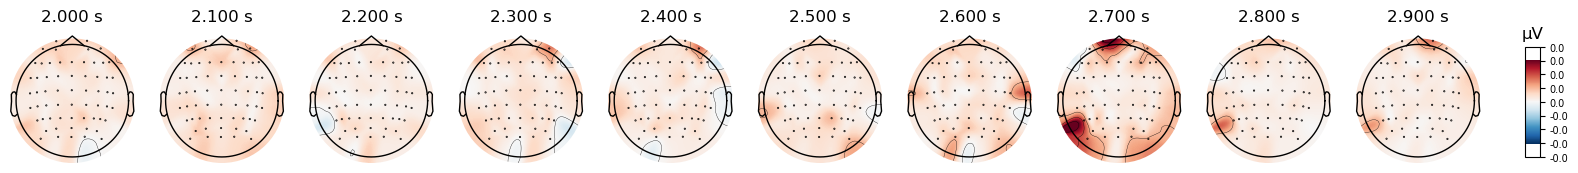

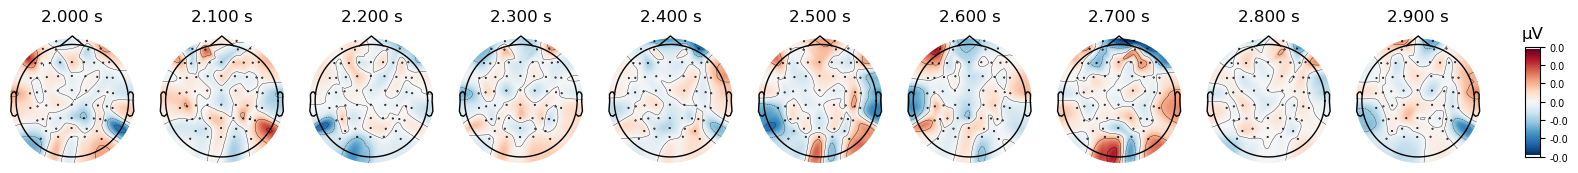

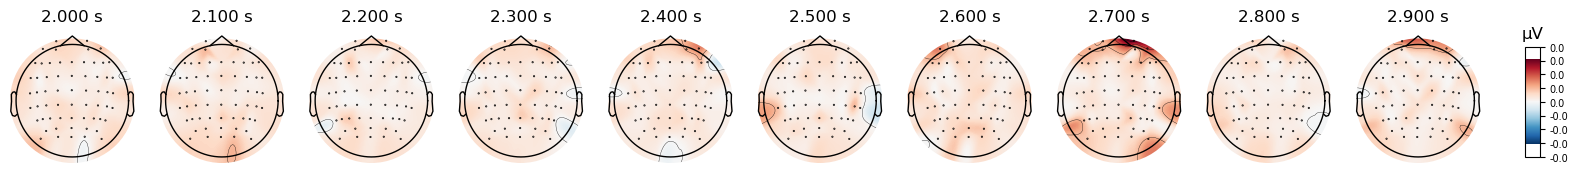

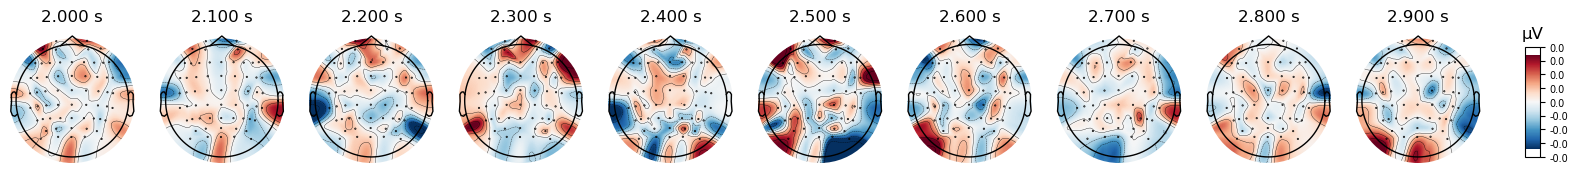

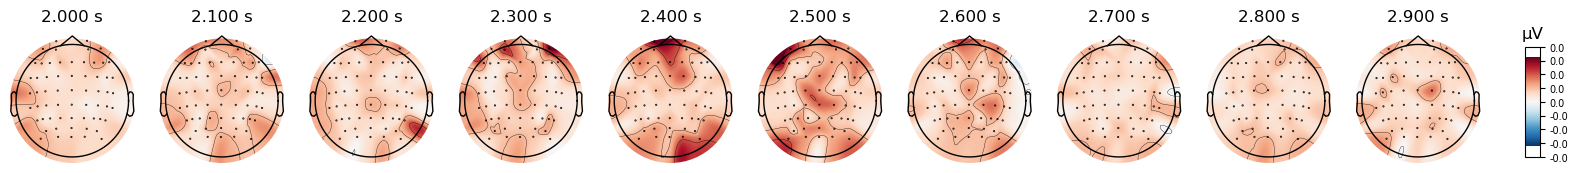

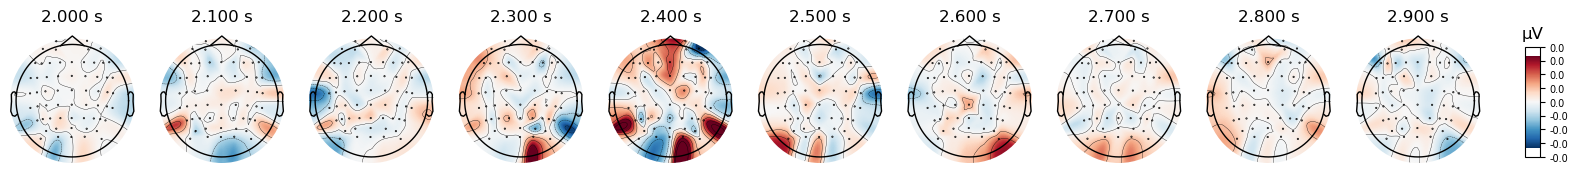

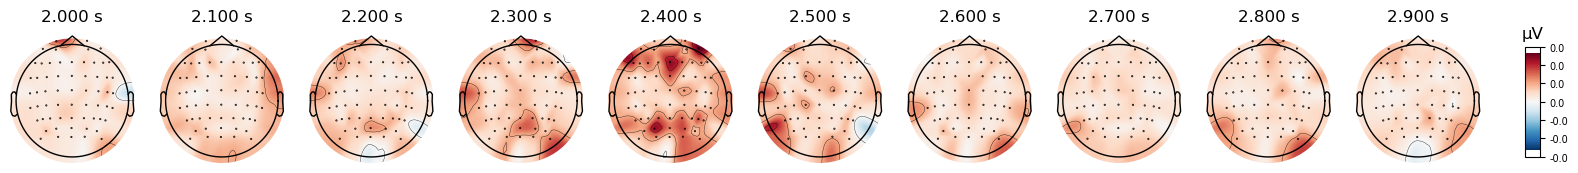

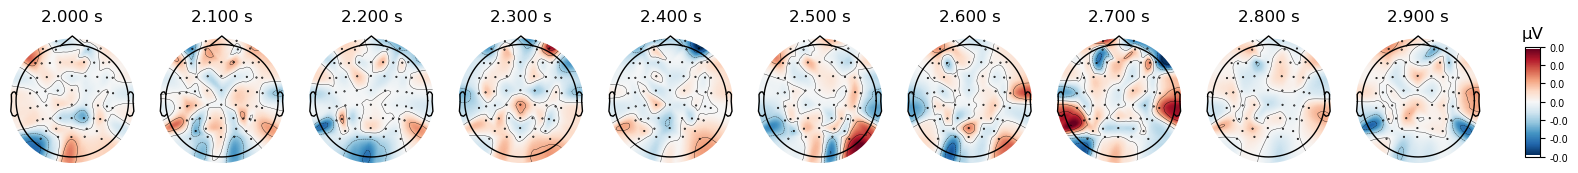

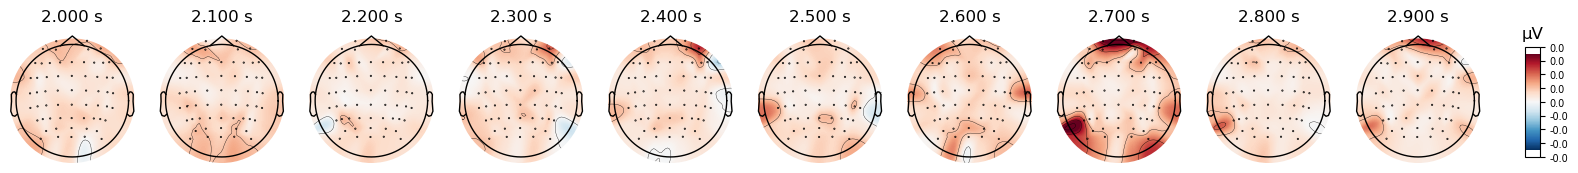

In [87]:
importlib.reload(visu)

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='results', dst_fldr='figs')

avg = visu.condition_topos(src_path, dst_path, subjects, alignment='cue-aligned', shrink=True)

In [11]:
pvals = np.load('D:/Diplomarbeit_data/eeg/results/regr-coeff-p-vals_cue-aligned_no-shrink.npy')


(61, 5, 1401)

(5, 61, 1401)
0
1
2
3


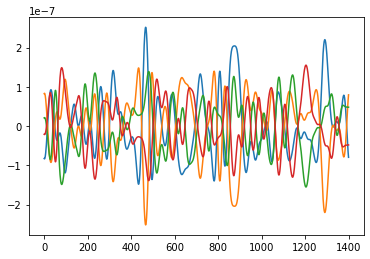

In [5]:
reg_coeff = np.load('D:/Diplomarbeit_data/eeg/results/regr-coeff_A03_cue-aligned_no-shrink.npy')

import matplotlib.pyplot as plt

print(reg_coeff.shape)
for cond in range(reg_coeff.shape[0]-1):
    print(cond)
    plt.plot(reg_coeff[cond,10,:])
plt.show()

In [101]:
s_intercept = np.ones((1,360))

temp = np.concatenate([s_intercept.squeeze(), s_intercept.squeeze()])

# s_intercept = (s_intercept - s_intercept.mean())/s_intercept.std()

In [128]:
X = np.array([[1,2,3],
              [4,5,6]])

Y = np.array([[2,4],
              [8,10],
              [14,16]])

In [134]:
cx = np.cov(X.T)
cy = np.cov(Y.T)

In [136]:
cx.dot(cy)

ValueError: shapes (3,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

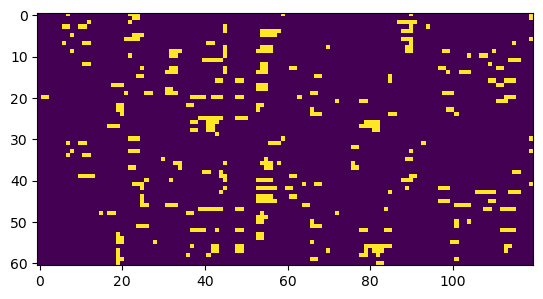

In [18]:
# Load p_vals of glm:
p_vals = np.load(f'{src_path}/two-sample-p-vals_cue-aligned_shrink.npy')

# Get binary mask for p_vals that are smaller than p_crit
p_crit = 0.05
p_bin = p_vals < p_crit
temp_p = p_vals[:,2,:]
import matplotlib.pyplot as plt
t = np.arange(0,1200,10)
plt.imshow(p_bin[:,0,t])